<a href="https://colab.research.google.com/github/tmelo-uea/covid19/blob/master/charts_data_in_brief_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import matplotlib.dates as mdates
import datetime
from datetime import date, timedelta
from wordcloud import WordCloud

# Load datasets

It is necessary to upload all files.

The files are available in [link](https://data.mendeley.com/datasets/vhxdgjfjnk)

This procedure can take a long time.

In [89]:
from google.colab import files
uploaded = files.upload()

Saving hashtags.csv to hashtags.csv


Read datasets

In [81]:
uol_dataset = pd.read_csv("uol.csv")
twitter_dataset = pd.read_csv("general.csv")

# Figure 1 - The trends of news and tweets regarding to COVID-19 topic

In [82]:
date_uol = []
for d in uol_dataset['date']:
  d_obj = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').replace(hour=0, minute=0, second=0)
  date_uol.append([d_obj])
d_uol = pd.DataFrame(date_uol, columns=['date'])  

date_twitter = []
for d in twitter_dataset['date']:
  d_obj = datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S').replace(hour=0, minute=0, second=0)
  date_twitter.append([d_obj])
d_twitter = pd.DataFrame(date_twitter, columns=['date'])

In [83]:
sdate = date(2020, 1, 1)
edate = date(2020, 5, 31)
delta = edate - sdate
freq = []
data = []

freq1 = {}
freq2 = {}
interval = []
sdate = date(2019, 12, 31)
for i in range (delta.days + 1):
  sdate += pd.DateOffset(days=1)
  interval.append(sdate)
  freq1[sdate] = 0
  freq2[sdate] = 0

for j in d_uol['date']:
  freq1[j] += 1

for j in d_twitter['date']:
  freq2[j] += 1

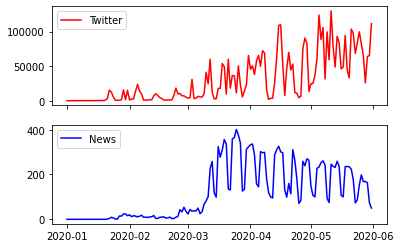

In [85]:
x = list(freq2.values())
y = list(freq1.values())

fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(interval,x,label='Twitter',color='red')
ax2.plot(interval,y,label='News',color='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

ax2.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
ax2.autoscale()

plt.show()

# Figure 2 - Distribution of tweets by keywords

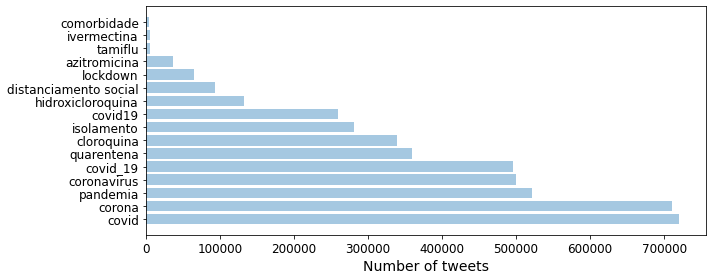

In [86]:
values = twitter_dataset['keyword'].value_counts()
names = twitter_dataset['keyword'].value_counts().keys()

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)

ax.set_xlabel("Number of tweets", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(yvals,names,fontsize=12)
plt.tight_layout()
plt.show()

# Figure 3 - Distribution of news considering the same keywords for Twitter

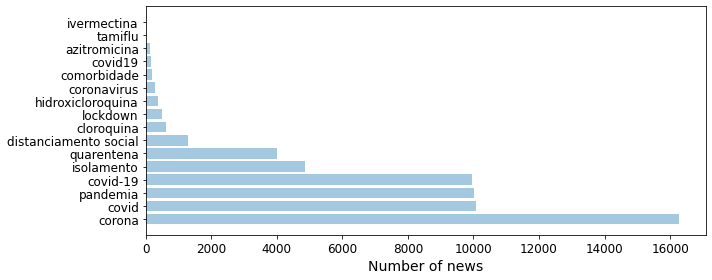

In [87]:
keywords = list(set(twitter_dataset['keyword']))
keywords.remove('covid_19')
keywords.append('covid-19')

d = {}
for k in keywords:
	total = 0
	for t in uol_dataset['text']:
		if k in t.lower():
			total+=1
	d[k] = total

values = []
keywords_sorted = []
a = sorted(d.items(), key=lambda x: x[1], reverse=True)
for i in a:
  values.append(i[1])
  keywords_sorted.append(i[0])

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
yvals = range(len(keywords_sorted))
ax.barh(yvals, values, align='center', alpha=0.4)

ax.set_xlabel("Number of news", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(yvals,keywords_sorted,fontsize=12)
plt.tight_layout()
plt.show()

# Figure 4 - Word cloud of hashtags on Twitter on COVID-19 topic

Read the file.

In [90]:
twitter_hashtag_dataset = pd.read_csv("hashtags.csv")

Plotting the word clouds.

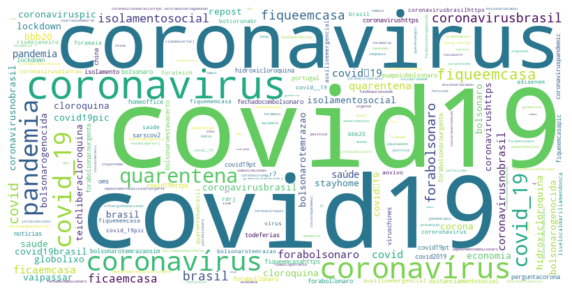

In [91]:
hashtags = []
for item in twitter_hashtag_dataset['tweet_hashtags']:
  for h in item.split(','):
    hashtags.append(h.lower())

d = {}
for k in set(hashtags):
  d[k] = 0

for k in hashtags:
  d[k] += 1

wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(d)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Figure 5 - Percentage of tweets with image or video

Read the files

In [92]:
twitter_dataset = pd.read_csv("general.csv")
twitter_media = pd.read_csv("media.csv")

In [93]:
tweets_media_ids = list(twitter_media['tweet_id'])

In [94]:
data_general = {}
for d, id in zip(twitter_dataset['date'], twitter_dataset['tweet_id']):
  d_obj = datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S')
  data_general[id] = d_obj.month

Total tweets for each month

In [95]:
data_total = [0,0,0,0,0]
for k,v in data_general.items():
  data_total[v-1] += 1

Total of tweets with media for each month

In [96]:
data_media_tmp = []
for id in twitter_media['tweet_id']:
  data_media_tmp.append(data_general[id])

data_media = []
for i in range (1,6):
  data_media.append(data_media_tmp.count(i))

Plotting the chart

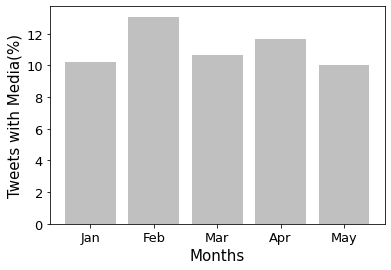

In [97]:
media_perc = []
for i in range(5):
  media_perc.append(data_media[i]*100/data_total[i])

N = 5
ind = np.arange(N) 

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.xticks(ind, months, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Tweets with Media(%)", fontsize=15)
plt.xlabel("Months", fontsize=15)

plt.bar(months, media_perc, width=0.8, label='bronzes', color='silver')
plt.show()